In [5]:
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# One model

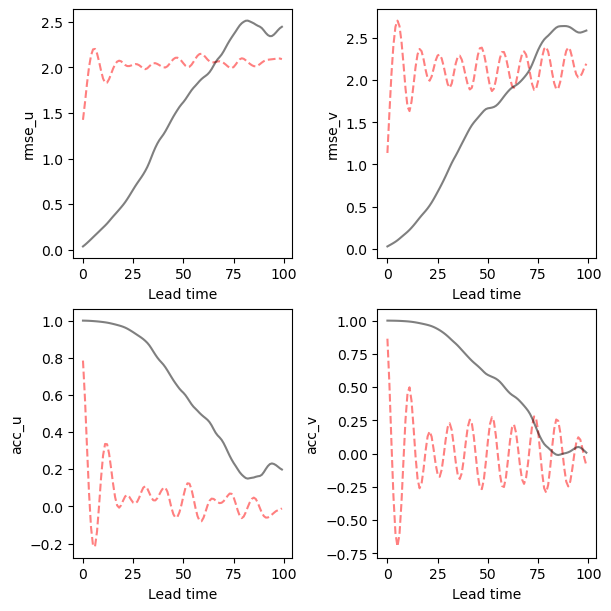

In [ ]:

# Load metrics and corresponding prune iterations

metrics_file = '/glade/derecho/scratch/jshen/2d-turbulence-vit/BASE/pruning_checkpoints/analyses/iteration_7_metrics.npz'
metrics = np.load(metrics_file)

# Metrics to plot

keys = ['rmse_u', 'rmse_v', 'acc_u', 'acc_v']

# Loop thru axs and data

fig, axs = plt.subplots(2, 2, figsize=(6, 6), constrained_layout=True)
for ax, key in zip(axs.flatten(), keys):

    # Plot persistence
    ax.plot(metrics[key + '_per'].mean(axis=0), color='r', linestyle='dashed', alpha=0.5)

    # Plot data curves
    ax.plot(metrics[key].mean(axis=0), color='k', alpha=0.5)
    ax.set_xlabel('Lead time')
    ax.set_ylabel(key)

# Many models

In [9]:
# Load metrics and corresponding prune iterations

dir = '/glade/derecho/scratch/jshen/2d-turbulence-vit/BASE/pruning_checkpoints/train_analyses/'
datas = [np.load(os.path.join(dir, fname)) for fname in os.listdir(dir)]
iterations = [int(fname[10]) for fname in os.listdir(dir)]

# Add base model

#datas.append(np.load('/glade/derecho/scratch/jshen/2d-turbulence-vit/BASE/base_metrics.npz'))
#iterations.append(-1)

percents_pruned = [1 - 0.88 ** (i+1) for i in iterations]
norm = mcolors.Normalize(vmin=min(percents_pruned), vmax=max(percents_pruned))

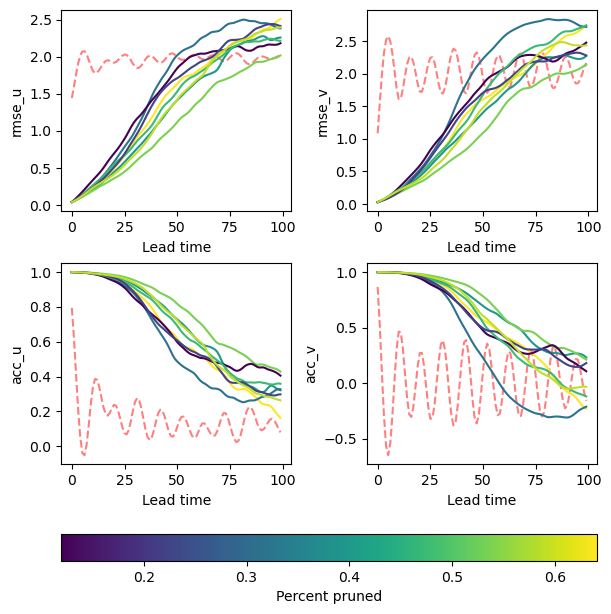

In [10]:

# Metrics to plot

keys = ['rmse_u', 'rmse_v', 'acc_u', 'acc_v']

# Loop thru axs and data

fig, axs = plt.subplots(2, 2, figsize=(6, 6), constrained_layout=True)
for ax, key in zip(axs.flatten(), keys):

    # Plot persistence
    ax.plot(datas[0][key + '_per'].mean(axis=0), color='r', linestyle='dashed', alpha=0.5)

    # Plot data curves
    for p, data in zip(percents_pruned, datas):
        ax.plot(data[key].mean(axis=0), color=plt.cm.viridis(norm(p)))
    
    ax.set_xlabel('Lead time')
    ax.set_ylabel(key)

# Create color bar

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axs, location='bottom', label="Percent pruned", pad=0.05)

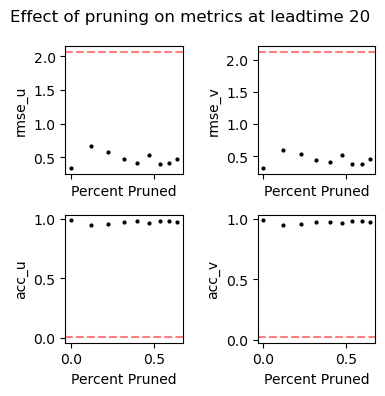

In [7]:
# Metrics to plot

keys = ['rmse_u', 'rmse_v', 'acc_u', 'acc_v']
leadtime = 19

# Loop thru axs and data

fig, axs = plt.subplots(2, 2, figsize=(4, 4), sharex=True)
for ax, key in zip(axs.flatten(), keys):

    # Plot persistence
    ax.axhline(datas[0][key + '_per'].mean(axis=0)[leadtime], color='r', linestyle='dashed', alpha=0.5)

    # Plot data curves
    metric = [data[key].mean(axis=0)[leadtime] for data in datas]
    ax.scatter(percents_pruned, metric, color='k', s=4)
    
    ax.set_xlabel('Percent Pruned')
    ax.set_ylabel(key)

fig.suptitle(f'Effect of pruning on metrics at leadtime {leadtime + 1}')
fig.tight_layout()

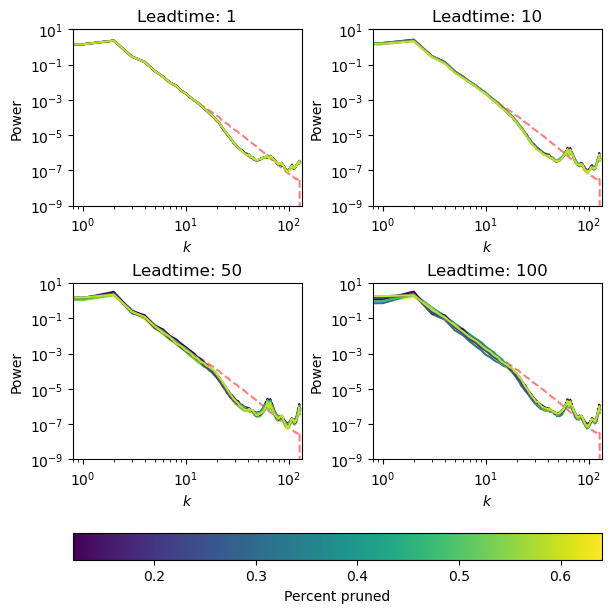

In [11]:
leadtimes = [0, 9, 49, 99]

fig, axs = plt.subplots(2, 2, figsize=(6, 6), constrained_layout=True)
for ax, lead in zip(axs.flatten(), leadtimes):
    ax.plot(data['wavenumbers'], data['spectra_tar'][0], linestyle='dashed', color='r', alpha=0.5)
    for p, data in zip(percents_pruned, datas):
        ax.plot(data['wavenumbers'], data['spectra'][lead], color=plt.cm.viridis(norm(p), alpha=1))
    
    ax.set_title(f'Leadtime: {lead+1}')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('$k$')
    ax.set_ylabel('Power')
    ax.set_ylim([10**(-9), 10])
    ax.set_xlim([0.8, (256+10)//2])

# Shared colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axs, location='bottom', label="Percent pruned", pad=0.05)
